# Milestone 2

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import os
import bz2
from src.QuoteBankData import QuoteBankData
from src.Deaths import Deaths
import src.utilities.quotebank_preprocessing_utils as utils
from src.CONSTS import DATA_PATH, COLORS, KEYWORDS_JSON_FILE_PATH, KEYWORDS_FILE_PATH
from tqdm import tqdm
from src.utilities.synonym_utils import add_new_synonyms
from mpl_toolkits.axes_grid1 import host_subplot

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\owode\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Quotebank preprocessing

Most of the code used for the quotebank preprocessing can be found in the classes QuotebankData and Keyword, in addition to in files for helper functions. 

In [2]:
def quotation_classification():
    """
    Iterate through all quotebank files, stored locally. For each quote inside the file, check which keywords match.
    Store the results in the respective output
    """
    quotes_filenames_list = utils.compose_quotebank_filenames()

    for index, filename in enumerate(quotes_filenames_list):
        print("Elaborating file: " + filename.split("/").pop())
        quotation_classification_for_file(filename)
        quotebank.write_matching_quotes_to_file_for_year(index)
        quotebank.delete_json_lines_for_all_keywords()

In [3]:
def quotation_classification_for_file(filename):
    """
    For every line of the input file (json file), extract the quotation.
    If any of the keyword is found inside the quotation, the corresponding (json) line gets saved inside json_lines attribute of the corresponding
    keyword object.
    :param filename: str 
    """
    if not os.path.isfile(filename):
        print(filename + " doesn't exist")
        return

    with bz2.open(filename, "rb") as file:
        for i, line in tqdm(enumerate(file)):
            if i == 5000: break
            quotation = utils.extract_quotation(line)
            found_keywords = quotebank.match_quotation_with_any_keyword(quotation)
            if len(found_keywords) > 0:
                for found_keyword in found_keywords:
                    found_keyword.json_lines.append(line)

Initialize quotebank
- read keyword and synonyms for death causes
- create folders and file names for quotes that matches keywords or synonyms
- match keywords and synonyms with quotes

In [4]:
add_new_synonyms(KEYWORDS_FILE_PATH, KEYWORDS_JSON_FILE_PATH)
quotebank = QuoteBankData("Asymmetry of News", [])
quotebank.read_keywords_from_file()
utils.create_directories_for_every_year()
quotebank.create_json_dumps_filenames_for_each_keyword()
quotation_classification()

meningitis
time taken: 6.826222658157349
total keywords: 23
lower respiratory infections
time taken: 6.416896104812622
total keywords: 38
intestinal infectious diseases
time taken: 11.133797645568848
total keywords: 99
protein-energy malnutrition
time taken: 7.6650331020355225
total keywords: 19
terrorism
time taken: 6.470458030700684
total keywords: 67
cardiovascular diseases
time taken: 12.203169107437134
total keywords: 136
alzheimer disease and other dementias
time taken: 3.6798572540283203
total keywords: 31
chronic kidney disease
time taken: 4.2593584060668945
total keywords: 63
chronic respiratory diseases
time taken: 6.099844694137573
total keywords: 27
cirrhosis and other chronic liver diseases
time taken: 6.931866407394409
total keywords: 35
digestive diseases
time taken: 9.863820314407349
total keywords: 72
hepatitis
time taken: 3.632356882095337
total keywords: 37
neoplasms
time taken: 5.205998420715332
total keywords: 210
parkinson disease
time taken: 2.017875909805298
tot

5000it [00:13, 374.57it/s]


Elaborating file: quotes-2011.json.bz2


5000it [00:14, 355.97it/s]


Elaborating file: quotes-2012.json.bz2


5000it [00:14, 350.58it/s]


Elaborating file: quotes-2013.json.bz2


5000it [00:12, 410.64it/s]


Elaborating file: quotes-2014.json.bz2


5000it [00:12, 387.44it/s]


Elaborating file: quotes-2015.json.bz2


5000it [00:12, 400.33it/s]


Elaborating file: quotes-2016.json.bz2


5000it [00:12, 389.64it/s]


Elaborating file: quotes-2017.json.bz2


5000it [00:12, 387.65it/s]


To illustrate the results, we plot the number of quotes found for each issue in 2016

In [5]:
occurences = list()
x_labels=list()
x_number = list()
count = 0
for keys in quotebank.keywords:
    with open(keys.output_filenames[8], 'rU') as f:
        keys.quotes = pd.read_json(keys.output_filenames[8], lines=True)
    occurences.append(len(keys.quotes))
    x_labels.append(keys.name)
    x_number.append(count)
    count += 1

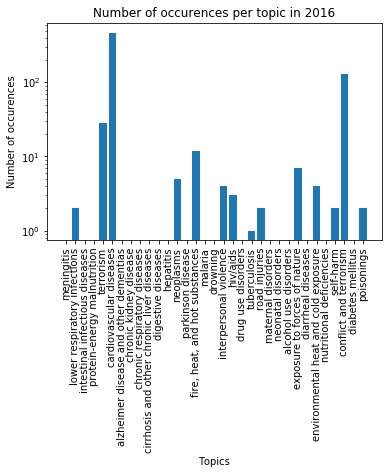

In [6]:
plt.bar(x_number, occurences, log = True)
plt.xticks(x_number, x_labels)
plt.xticks(rotation=90)
plt.title("Number of occurences per topic in 2016")
plt.xlabel("Topics")
plt.ylabel("Number of occurences")
plt.show()

In [7]:
def freq_per_month(df):
    freqs = np.zeros(12)
    for i in range(12):
        freqs[i] = np.sum(df["date"].dt.month == i+1)
    return freqs

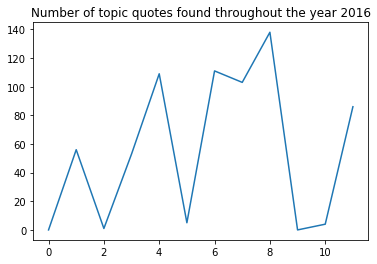

In [8]:
all_freq = list()
for keys in quotebank.keywords:
    if not keys.quotes.empty:
        all_freq.append(freq_per_month(keys.quotes))
    else:
        all_freq.append(np.zeros(12))
df = pd.DataFrame(all_freq)

plt.plot(np.sum(df))
plt.title("Number of topic quotes found throughout the year 2016")
plt.show()

# Population data preprocessing
This is population data from the UN, which we might use in combination with the Our World in Data datasets to get a more realistic understanding of the relative deaths each year.

In [9]:
population_path = DATA_PATH + "annual_population_data.csv"
raw_population_df = pd.read_csv(population_path)
raw_population_df

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


Extracting world population in millions from 2008 to 2017

In [10]:
population_df = raw_population_df[(raw_population_df["Location"] == "World") & (raw_population_df["Time"] > 2007) & (raw_population_df["Time"] < 2018)]
population_df = population_df[["Time", "PopTotal"]].reset_index(drop=True)
population_df["PopTotal"] = population_df["PopTotal"].apply(lambda x: x/1000)
population_df = population_df.rename(columns = {"Time": "Year", "PopTotal": "World population millions"})
population_df

,Year,World population millions
0,2008,6789.088672
1,2009,6872.766988
2,2010,6956.823588
3,2011,7041.194168
4,2012,7125.827957
5,2013,7210.582041
6,2014,7295.290759
7,2015,7379.796967
8,2016,7464.021934
9,2017,7547.858900


# Our World in Data preprocessing

This part of the notebook is more exploratory. We wanted to preprocess and look at the two main datasets form Our World in Data to be sure that the project is possible to do. 

## Preprocess death data

### Deaths by cause

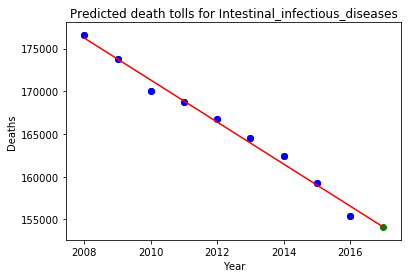

,Entity,Code,Year,Meningitis,Lower_respiratory_infections,Intestinal_infectious_diseases,Protein-energy_malnutrition,Terrorism,Cardiovascular_diseases,Alzheimer_disease_and_other_dementias,...,Neonatal_disorders,Alcohol_use_disorders,Exposure_to_forces_of_nature,Diarrheal_diseases,Environmental_heat_and_cold_exposure,Nutritional_deficiencies,Self-harm,Conflict_and_terrorism,Diabetes_mellitus,Poisonings
0,World,OWID_WRL,2008,348040.083847,2.657275e+06,176583.045171,304321.884855,9157.0,1.500828e+07,1.790400e+06,...,2.304429e+06,179987.013172,235496.829431,1.867836e+06,60384.613529,345703.367968,789447.007136,58795.082371,1.045381e+06,78008.099106
1,World,OWID_WRL,2009,340514.177436,2.639562e+06,173745.686452,297263.561629,9273.0,1.527431e+07,1.863444e+06,...,2.258315e+06,175052.864372,9254.003678,1.865671e+06,59023.804629,338690.981517,791222.757559,67916.308722,1.070186e+06,77339.491051
2,World,OWID_WRL,2010,331205.914662,2.623649e+06,170071.404053,299956.052686,7827.0,1.561962e+07,1.943961e+06,...,2.211208e+06,174237.378348,248454.699157,1.857640e+06,115382.599926,341835.027741,796083.645174,50608.273695,1.096402e+06,77298.902918
3,World,OWID_WRL,2011,325000.383494,2.616651e+06,168716.792532,288907.141759,8246.0,1.585974e+07,2.025064e+06,...,2.162070e+06,170736.669200,31964.196615,1.793641e+06,57402.483668,329818.068512,793977.906088,100568.611560,1.129959e+06,76227.682073
4,World,OWID_WRL,2012,316965.020009,2.605154e+06,166735.397312,269574.084338,15497.0,1.611549e+07,2.098871e+06,...,2.110626e+06,169930.031855,6625.594444,1.725018e+06,57658.367887,309650.953725,786335.554940,111432.890101,1.168569e+06,75414.520357
5,World,OWID_WRL,2013,312013.523643,2.590482e+06,164572.376351,259203.023575,22273.0,1.628402e+07,2.168918e+06,...,2.050610e+06,170965.247716,19050.473289,1.664193e+06,55823.991356,298365.543019,779212.549795,115138.255671,1.202743e+06,74906.641101
6,World,OWID_WRL,2014,306484.322622,2.579538e+06,162420.462719,250311.830788,44490.0,1.662836e+07,2.253866e+06,...,1.989193e+06,173684.698467,6503.060539,1.619718e+06,55072.834100,289184.845108,781716.697241,182239.944451,1.249135e+06,74439.682294
7,World,OWID_WRL,2015,298711.517721,2.582199e+06,159257.591692,243750.598948,38853.0,1.713999e+07,2.353634e+06,...,1.925458e+06,178372.485978,14748.187609,1.578439e+06,57740.167042,282498.011863,782941.162890,137629.287532,1.299556e+06,74394.517062
8,World,OWID_WRL,2016,295878.990018,2.574625e+06,155448.606112,236429.610442,34871.0,1.752437e+07,2.440042e+06,...,1.852924e+06,181679.094522,7261.252562,1.550848e+06,54183.052891,274881.027448,788674.564776,158356.402289,1.346428e+06,73643.079320
9,World,OWID_WRL,2017,288021.105387,2.558606e+06,154107.234208,231770.992044,26445.0,1.779095e+07,2.514619e+06,...,1.783770e+06,184934.241760,9602.935057,1.569556e+06,53349.518780,269996.917689,793823.469135,129720.145674,1.369849e+06,72370.531920


In [11]:
death_by_cause_path = DATA_PATH + "annual_number_of_deaths_by_cause.csv"
deaths_by_cause = Deaths("deaths_by_cause", death_by_cause_path, rename_cols = {'Terrorism (deaths)': 'Terrorism'}, drop_cols = ['Number of executions (Amnesty International)'])
deaths_by_cause.df

In [12]:
deaths_by_cause.percentage_df

,Entity,Code,Year,Meningitis,Lower_respiratory_infections,Intestinal_infectious_diseases,Protein-energy_malnutrition,Terrorism,Cardiovascular_diseases,Alzheimer_disease_and_other_dementias,...,Neonatal_disorders,Alcohol_use_disorders,Exposure_to_forces_of_nature,Diarrheal_diseases,Environmental_heat_and_cold_exposure,Nutritional_deficiencies,Self-harm,Conflict_and_terrorism,Diabetes_mellitus,Poisonings
0,World,OWID_WRL,2008,0.700192,5.345947,0.355253,0.612240,0.018422,30.193900,3.601955,...,4.636086,0.362101,0.473776,3.757741,0.121483,0.695491,1.588222,0.118285,2.103115,0.156938
1,World,OWID_WRL,2009,0.682428,5.289976,0.348206,0.595749,0.018584,30.611429,3.734549,...,4.525914,0.350825,0.018546,3.739013,0.118290,0.678774,1.585699,0.136112,2.144772,0.154997
2,World,OWID_WRL,2010,0.653592,5.177430,0.335614,0.591924,0.015446,30.823280,3.836153,...,4.363531,0.343835,0.490293,3.665810,0.227693,0.674567,1.570967,0.099869,2.163606,0.152539
3,World,OWID_WRL,2011,0.640791,5.159152,0.332653,0.569627,0.016258,31.270041,3.992743,...,4.262872,0.336635,0.063023,3.536454,0.113178,0.650290,1.565456,0.198287,2.227897,0.150295
4,World,OWID_WRL,2012,0.622269,5.114465,0.327337,0.529231,0.030424,31.638096,4.120525,...,4.143603,0.333608,0.013007,3.386573,0.113196,0.607910,1.543742,0.218766,2.294146,0.148055
5,World,OWID_WRL,2013,0.610462,5.068342,0.321990,0.507137,0.043578,31.860088,4.243542,...,4.012069,0.334498,0.037273,3.256034,0.109221,0.583759,1.524548,0.225271,2.353196,0.146557
6,World,OWID_WRL,2014,0.591830,4.981157,0.313638,0.483359,0.085911,32.109811,4.352276,...,3.841186,0.335390,0.012558,3.127720,0.106347,0.558424,1.509516,0.351910,2.412113,0.143745
7,World,OWID_WRL,2015,0.567101,4.902279,0.302349,0.462758,0.073762,32.540099,4.468350,...,3.655462,0.338638,0.027999,2.996650,0.109619,0.536320,1.486406,0.261288,2.467194,0.141237
8,World,OWID_WRL,2016,0.554221,4.822619,0.291176,0.442864,0.065318,32.825503,4.570527,...,3.470776,0.340309,0.013601,2.904948,0.101492,0.514889,1.477294,0.296623,2.522040,0.137943
9,World,OWID_WRL,2017,0.534836,4.751165,0.286167,0.430384,0.049107,33.036636,4.669484,...,3.312345,0.343411,0.017832,2.914563,0.099067,0.501367,1.474079,0.240882,2.543720,0.134387


### Deaths by category

In [13]:
death_by_category_path = DATA_PATH + "categorized_annual_number_of_deaths.csv"
deaths_by_category = Deaths("deaths_by_category", death_by_category_path)
deaths_by_category.df

,Entity,Code,Year,Non-communicable_diseases,"Communicable,_maternal,_neonatal,_and_nutritional_diseases",Injuries
0,World,OWID_WRL,2008,3.418150e+07,1.308734e+07,4.634715e+06
1,World,OWID_WRL,2009,3.483548e+07,1.281121e+07,4.425399e+06
2,World,OWID_WRL,2010,3.559222e+07,1.252802e+07,4.718076e+06
3,World,OWID_WRL,2011,3.621622e+07,1.219007e+07,4.487698e+06
4,World,OWID_WRL,2012,3.683037e+07,1.180971e+07,4.462361e+06
5,World,OWID_WRL,2013,3.735997e+07,1.146154e+07,4.452354e+06
6,World,OWID_WRL,2014,3.825766e+07,1.117078e+07,4.507679e+06
7,World,OWID_WRL,2015,3.945300e+07,1.088245e+07,4.486745e+06
8,World,OWID_WRL,2016,4.040355e+07,1.060071e+07,4.505297e+06
9,World,OWID_WRL,2017,4.107113e+07,1.038987e+07,4.484722e+06


In [14]:
deaths_by_category.percentage_df

,Entity,Code,Year,Non-communicable_diseases,"Communicable,_maternal,_neonatal,_and_nutritional_diseases",Injuries
0,World,OWID_WRL,2008,65.855794,25.214733,8.929473
1,World,OWID_WRL,2009,66.898568,24.602832,8.498600
2,World,OWID_WRL,2010,67.360623,23.710107,8.929270
3,World,OWID_WRL,2011,68.469444,23.046231,8.484325
4,World,OWID_WRL,2012,69.357208,22.239485,8.403306
5,World,OWID_WRL,2013,70.128132,21.514385,8.357483
6,World,OWID_WRL,2014,70.931427,20.711133,8.357440
7,World,OWID_WRL,2015,71.965378,19.850444,8.184177
8,World,OWID_WRL,2016,72.786653,19.097091,8.116256
9,World,OWID_WRL,2017,73.412455,18.571344,8.016201


## Plotting

### Deaths by cause

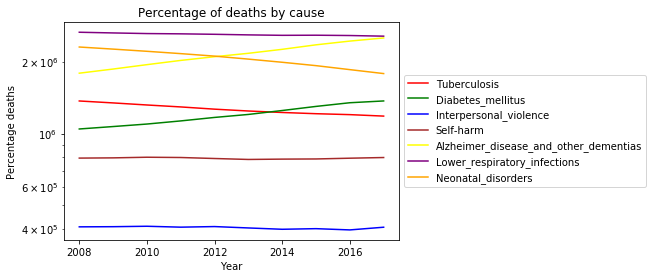

In [15]:
deaths_by_cause.plot_lines("Percentage deaths", "Percentage of deaths by cause")

### Deaths by category

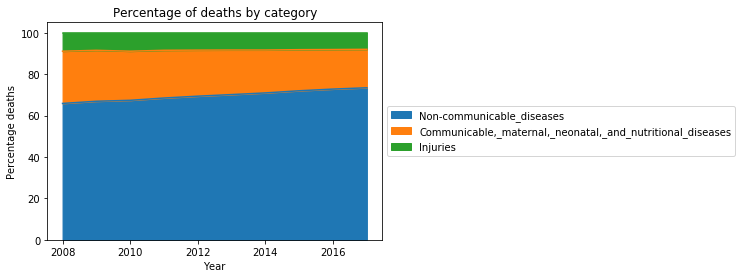

In [16]:
deaths_by_category.plot_stacked_areas("Percentage deaths", "Percentage of deaths by category")

# RQ1

# RQ2

In [25]:
import matplotlib.pyplot as plt
def plot_QUOTEBANK_death_per_year(death_cause, x_lab, y_lab, tit, year_list = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]):

  occurences = list()
  key = quotebank.get_keyword_by_name(death_cause)

  for year in year_list:
    key.quotes = pd.read_json(key.output_filenames[year - 2008], lines=True)
    occurences.append(len(key.quotes))
  plt.plot(year_list, occurences)
  #plt.title(tit + key.name)
  #plt.xlabel(x_lab)
  #plt.ylabel(y_lab)
  plt.xticks(year_list)
  plt.show()

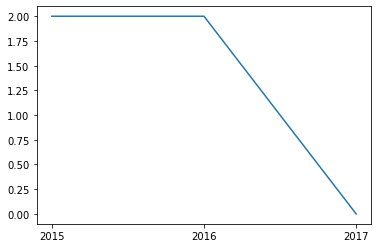

In [26]:
plot_QUOTEBANK_death_per_year("lower respiratory infections", "Year", "Number of occurences", "QUOTEBANK, ", [2015, 2016, 2017])

In [27]:
def plot_ACTUAL_death_per_year(death_cause, df, x_label, y_label, title, year_list = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]):

  occurences = list()
  for year in year_list:
    occurences.append(df.loc[df['Year'] == year][death_cause].values)

  plt.plot(year_list, occurences)
  #plt.title(title + death_cause)
  #plt.xlabel(x_label)
  #plt.ylabel(y_label)
  plt.xticks(year_list)
  plt.show()

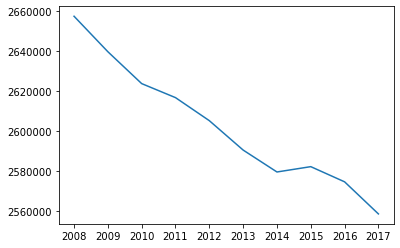

In [20]:
plot_ACTUAL_death_per_year("Lower_respiratory_infections", deaths_by_cause.df, "Year", "Number of occurences", "ACTUAL, ")

In [21]:
def plot_actual_vs_quote_per_year(d_c_q, d_c_a,  df, x_label, y_label_1, y_label_2, 
year_list = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]):
    
    quote_occurences = list()
    key = quotebank.get_keyword_by_name(d_c_q)
    for year in year_list:
        key.quotes = pd.read_json(key.output_filenames[year - 2008], lines=True)
        quote_occurences.append(len(key.quotes))
    actual_occurences = list()
    for year in year_list:
        actual_occurences.append(df.loc[df['Year'] == year][d_c_a].values)
    host = host_subplot(111)

    par = host.twinx()

    host.set_xlabel(x_label)
    host.set_ylabel(y_label_1)
    par.set_ylabel(y_label_2)

    p1, = host.plot(year_list, quote_occurences, label=y_label_1)
    p2, = par.plot(year_list, actual_occurences, label=y_label_2)

    leg = plt.legend()

    host.yaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.yaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())
    plt.xticks(year_list)
    plt.show()

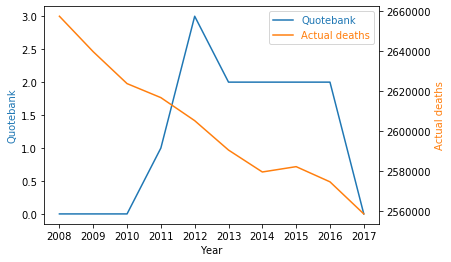

In [22]:
plot_actual_vs_quote_per_year("lower respiratory infections", "Lower_respiratory_infections", deaths_by_cause.df, 
"Year", "Quotebank", "Actual deaths")